In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib.offsetbox import AnchoredText
from coffea.util import load
from coffea.hist import plot
from coffea import hist
import re
import argparse
import json
import math
import os

plt.style.use(hep.style.ROOT)

data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
from cycler import cycler
import matplotlib as mpl
# colors=["#F44336","#E91E63","#9C27B0","#673AB7","#3F51B5","#2196F3","#03A9F4","#00BCD4","#009688","#4CAF50","#8BC34A","#CDDC39","#FFEB3B","#FFC107","#FF9800","#FF5722","#795548","#BDBDBD","#9E9E9E","#616161","#90BED4","#607D8B","#455A64"]

colors = ["#5F4690","#1D6996","#38A6A5","#0F8554","#73AF48","#EDAD08","#E17C05","#CC503E","#94346E","#666666","#6F4070","#994E95"]
mpl.rcParams["axes.prop_cycle"] = cycler('color', colors)
from matplotlib.offsetbox import AnchoredText
from utils.xs_scaler import scale_xs

with open('metadata/mergemap.json') as json_file:  
    merge_map = json.load(json_file)
with open('metadata/plotmap.json') as pltf:
    var_map = json.load(pltf)

In [6]:
import pandas as pd
xs_dict={'gchcWW2QLNu':0.175*0.6741*0.3258*0.2137,'gchcWW2L2Nu':0.175*0.3258*0.3258*0.2137,'gchcZZ2L2Nu':0.175*0.100974*0.2*0.02641,'gchcZZ2L2Q':0.175*0.100974*0.69911*0.02641,'GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8':48.58*0.6741*0.3258*0.2137,'GluGluHToWWTo2L2Nu_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8':48.58*0.3258*0.3258*0.2137,'GluGluHToZZTo2L2Q_M125_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8':48.58*0.100974*0.69911*0.02641,'GluGluHToZZTo2L2Nu_M125_TuneCP5_13TeV_powheg2_JHUGenV735_pythia8':48.58*0.100974*0.2*0.02641}
# print(output)
lumi= 41500 

# HZZ2l2q={'gchcWW2QLNu':{'all': 22652.0, 'global selection': 1307, 'dr': 310, 'mjj mass': 278, 'dphi mT': 278, 'tag one jets': 261, 'jet eff': 261, 'electron eff': 114, 'muon eff': 150}, 'gchcZZ2L2Q':  {'all': 63366.0, 'global selection': 2376, 'dr': 393, 'mjj mass': 342, 'dphi mT': 342, 'tag one jets': 251, 'jet eff': 251, 'electron eff': 125, 'muon eff': 128}, 'gchcZZ2L2Nu':  {'all': 45100.0, 'global selection': 5813, 'dr': 702, 'mjj mass': 601, 'dphi mT': 601, 'tag one jets': 434, 'jet eff': 434, 'electron eff': 234, 'muon eff': 210}, 'gchcWW2L2Nu': {'all':  45160.0, 'global selection': 8410, 'dr': 1235, 'mjj mass': 1076, 'dphi mT': 1076, 'tag one jets': 954, 'jet eff': 954, 'electron eff': 453, 'muon eff': 552}}
# output2 = load('hists_HWW2qlnu_higgsggH_UL17.coffea')
# print(output2)

HZZ2l2q =  {'gchcWW2QLNu': {'all': 112866.0, 'global selection': 36, 'signal region': 16, 'selected jets': 16, 'all ee': 8, 'all mumu': 1, 'all emu': 7}, 'gchcZZ2L2Q':  {'all': 112144.0, 'global selection': 14367, 'signal region': 5006, 'selected jets': 5006, 'all ee': 2557, 'all mumu': 745, 'all emu': 7}, 'gchcWW2L2Nu': {'all': 115656.0, 'global selection': 21479, 'signal region': 13847, 'selected jets': 13847, 'all ee': 3355, 'all mumu': 3560, 'all emu': 6917}, 'gchcZZ2L2Nu': {'all': 113410.0, 'global selection': 18813, 'signal region': 5754, 'selected jets': 5754, 'all ee': 2799, 'all mumu': 1028, 'all emu': 6}}
wei = {}
for xs in HZZ2l2q.keys():
    #All(include tau)
    wei[xs]=xs_dict[xs]*lumi/HZZ2l2q[xs]['all']
#     print(xs,wei[xs])
    for items in HZZ2l2q[xs].keys():
        HZZ2l2q[xs][items] = wei[xs]*HZZ2l2q[xs][items]
#         print(HZZ2l2q[xs][items]/HZZ2l2q[xs]['all'])
# print(HZZ2l2q['gchcWW2QLNu']['all'])
# print(type(HZZ2l2q))
# from_dict(your_dict,orient='index')
pd.DataFrame.from_dict(HZZ2l2q)

,gchcWW2QLNu,gchcZZ2L2Q,gchcWW2L2Nu,gchcZZ2L2Nu
all,340.852179,13.539718,164.737635,3.873416
global selection,0.108719,1.734601,30.594173,0.642541
signal region,0.048320,0.604400,19.723335,0.196523
selected jets,0.048320,0.604400,19.723335,0.196523
all ee,0.024160,0.308720,4.778782,0.095597
all mumu,0.003020,0.089948,5.070779,0.035110
all emu,0.021140,0.000845,9.852409,0.000205


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/hist_tools.py:377: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f8c7cda32d0>
  "Not all requested indices present in %r" % self, RuntimeWarning
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw 

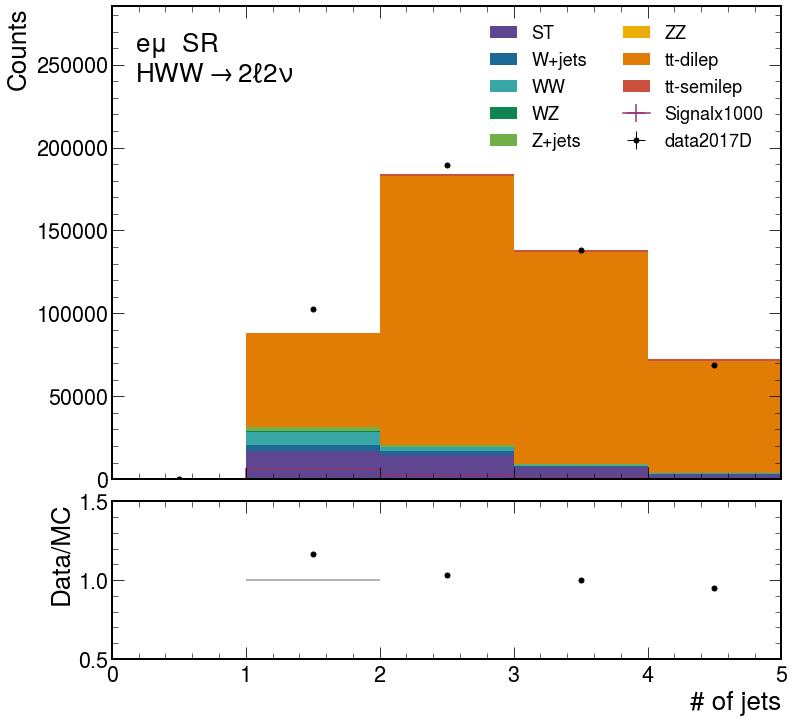

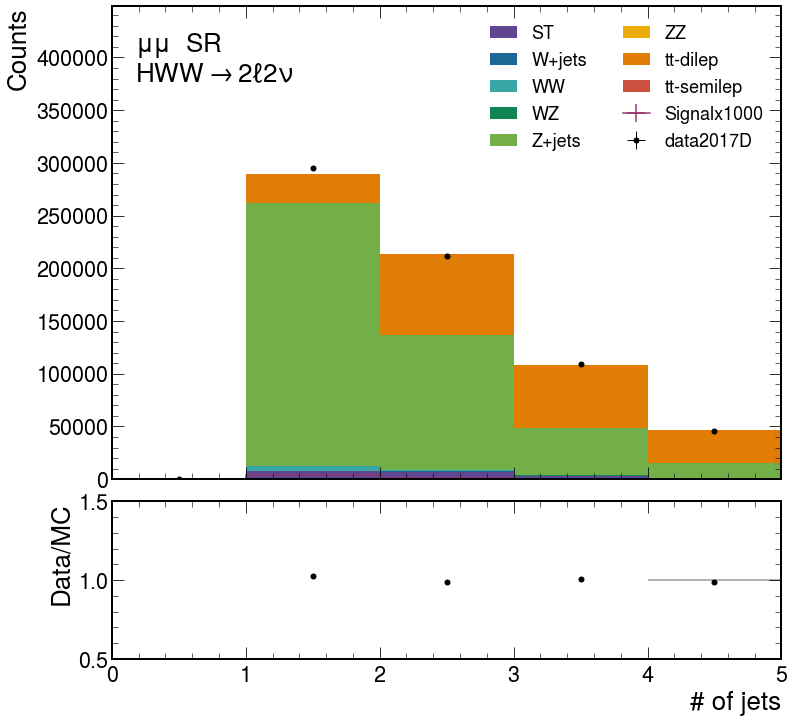

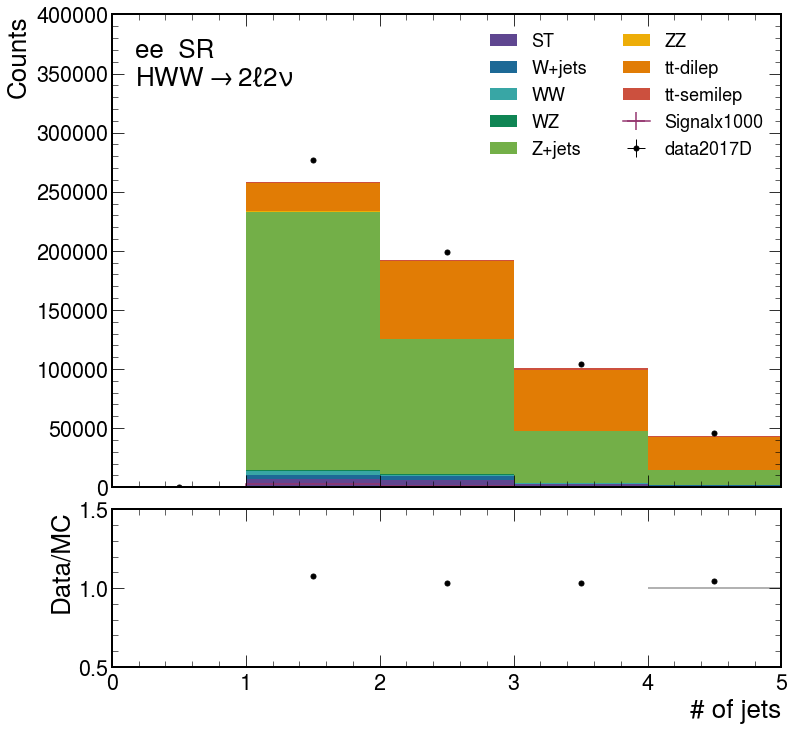

In [37]:
outputWWl_s = load('hists_HWW2l2nu_signal_UL17.coffea')
outputWWl_b = load('hists_HWW2l2nu_mcbkg_UL17_up.coffea')
# outputWWl_dy = load('hists_HWW2l2nu_dy_nl.coffea')
# outputWWl_b2 = load('hists_HWW2l2nu_mcbkg_UL17small.coffea')
outputWWl_data = load('hists_HWW2l2nu_dataD.coffea') 
# outputWWl_qcd = load('hists_HWW2l2nu_qcd.coffea')
# print(outputWWl_data)
# outputWWl_b2 = load('hists_HWW2l2nu_minorbkg_UL17small.coffea')
# print(outputWWl_b2)
# outputWWl_data = load('hists_HWW2qlnu_singleD.coffea')
eventWWl_s = outputWWl_s['sumw']
eventWWl_b = outputWWl_b['sumw']
# eventWWl_dy = outputWWl_dy['sumw']
# eventWWl_qcd = outputWWl_qcd['sumw']
# eventWWl_b2=outputWWl_b2['sumw']
os.makedirs('/eos/user/m/milee/www/HWW2l2nu/', exist_ok=True)
ch = ['emu','mumu','ee']
regions = ['SR']#,'SR2','SR1','DY_CR1','DY_CR2','top_CR1','top_CR2']
for var in ['nj']:#['mT2','mT1','mTh','ll_mass','ll_pt','MET_pt','jetflav_pt','jetflav_btagDeepFlavCvL','jetflav_btagDeepFlavCvB']:#outputWWl_b.keys():   
    
    outputWWl_s[var]=scale_xs(outputWWl_s[var],4319*1000,eventWWl_s)
    outputWWl_b[var]=scale_xs(outputWWl_b[var],4319,eventWWl_b)
#     outputWWl_dy[var]=scale_xs(outputWWl_dy[var],4319,eventWWl_dy)
#     outputWWl_b2[var]=scale_xs(outputWWl_b2[var],4319,eventWWl_b2)
#     outputWWl_qcd[var]=scale_xs(outputWWl_qcd[var],4319,eventWWl_qcd)
    
    outputWWl_b[var]=outputWWl_b[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hww_MC'])
#     outputWWl_dy[var]=outputWWl_dy[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hww_MC'])
#     outputWWl_b2[var]=outputWWl_b2[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hww_MC'])
#     outputWWl_qcd[var]=outputWWl_qcd[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hww_MC'])
    outputWWl_data[var]=outputWWl_data[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['data'])

    if var == 'nbj' or var == 'ncj' or 'jetpt_' in var or 'jetcsv_' in var  or 'jetpn_' in var or 'dr' in var or var=='MET_covXY' : continue    
    if var == 'cutflow':break
    
    for chs in ch:
        for region in regions:
            fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
            fig.subplots_adjust(hspace=.07)  

            if 'jet' in var:
                ax = plot.plot1d(outputWWl_b[var].sum("flav").integrate("lepflav",chs).integrate('region',region),overlay="plotgroup",stack=True,ax=ax)
                hdata = outputWWl_data[var].sum("flav").integrate("lepflav",chs).integrate('region',region).integrate('plotgroup','data_%s'%(chs))
                plot.plot1d(hdata,clear=False,error_opts=data_err_opts,ax=ax)
                plot.plot1d(outputWWl_s[var].sum("flav").integrate("lepflav",chs).integrate('region',region).integrate('dataset','gchcWW2L2Nu'),clear=False,ax=ax)
                rax = plot.plotratio(num=hdata,
                                            denom=outputWWl_b[var].sum("plotgroup").sum("flav").integrate("lepflav",chs).integrate('region',region),
                                                    ax=rax,
                                                    error_opts=data_err_opts,
                                                    denom_fill_opts={},                                              
    #                                       
                                                    unc='num',
                                                clear=False
                                                    )
                rax.set_ylim(0.5,1.5)
            else:
                ax = plot.plot1d(outputWWl_b[var].integrate("lepflav",chs).integrate('region',region),overlay='plotgroup',stack=True,ax=ax)
                
#                 print(sum(outputWWl_s[var].integrate("lepflav",chs).integrate('region',region).integrate('dataset','gchcWW2L2Nu').values()[()])/10000.,sum(outputWWl_s[var].integrate("lepflav",chs).integrate('region',region).integrate('dataset','gchcWW2L2Nu').values()[()])/10000./math.sqrt((sum(outputWWl_b[var].integrate("lepflav",chs).integrate('region',region).sum('plotgroup').values()[()])+sum(outputWWl_qcd[var].integrate("lepflav",chs).integrate('region',region).sum('plotgroup').values()[()]))))

        
#                 ax = plot.plot1d(outputWWl_qcd[var].integrate("lepflav",chs).integrate('region',region),overlay='plotgroup',stack=True,clear=False,ax=ax)
#                 ax = plot.plot1d(outputWWl_b2[var].integrate("lepflav",chs).integrate('region',region),overlay='plotgroup',stack=True,clear=False,ax=ax)

                plot.plot1d(outputWWl_s[var].integrate("lepflav",chs).integrate('region',region).integrate('dataset','gchcWW2L2Nu'),clear=False,ax=ax)

                hdata = outputWWl_data[var].integrate("lepflav",chs).integrate('region',region).integrate('plotgroup','data_%s'%(chs))
                plot.plot1d(hdata,clear=False,error_opts=data_err_opts,ax=ax)
                rax = plot.plotratio(num=hdata,
                                                    denom=outputWWl_b[var].sum("plotgroup").integrate('region',region).integrate("lepflav",chs),
                                                    ax=rax,
                                                    error_opts=data_err_opts,
                                                    denom_fill_opts={},    
                                                    unc='num',
                                                    clear=False)
            rax.set_ylim(0.5,1.5)
            rax.set_ylabel('Data/MC')
            rax.set_xlabel(var_map[var])
            ax.set_xlabel('')
            chl = chs
            if chs =='mumu' :chs='$\mu\mu$'
            if chs =='emu' :chs='e$\mu$'
            at = AnchoredText(chs+"  "+region+"\n" +r"HWW$\rightarrow 2\ell 2\nu$"                                                         
                                        , loc='upper left',frameon=False)
            ax.add_artist(at)
            leg_label = ax.get_legend_handles_labels()[1]
            leg_label[-1]='data2017D'
            leg_label[-2]='Signalx1000'
            ax.legend(loc="upper right",handles=ax.get_legend_handles_labels()[0],ncol=2,labels=leg_label,fontsize=18)
            hep.mpl_magic(ax= ax)
            fig.savefig("/eos/user/m/milee/www/HWW2l2nu/%s_%s_%s.pdf" %(chl,region,var))
            fig.savefig("/eos/user/m/milee/www/HWW2l2nu/%s_%s_%s.png" %(chl,region,var))
            


In [39]:
with open('metadata/plotmap.json') as pltf:
    var_map = json.load(pltf)
outputZZq_s = load('hists_HZZ2l2q_signal_UL17.coffea')
outputZZq_b = load('hists_HZZ2l2q_dy.coffea')
# outputZZq_dy = load('hists_HZZ2l2q_dy_nl.coffea')
outputZZq_data = load('hists_HZZ2l2q_dataD_noEG.coffea')
eventZZq_s = outputZZq_s['sumw']
eventZZq_b = outputZZq_b['sumw']
# eventZZq_dy = outputZZq_dy['sumw']
print(eventZZq_b)

ch = ['mumu','ee']
os.makedirs('/eos/user/m/milee/www/HZZ2l2q/', exist_ok=True)
print(outputZZq_b.keys())
for var in ['nj']:#outputZZq_b.keys():   
    
    outputZZq_s[var]=scale_xs(outputZZq_s[var],4319*1e6,eventZZq_s)
    outputZZq_b[var]=scale_xs(outputZZq_b[var],4319,eventZZq_b)
    outputZZq_b[var]=outputZZq_b[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hww_MC'])
    outputZZq_data[var]=outputZZq_data[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['data']) 
    print(var)
#     if var == 'nbj' or var == 'ncj' or var=='nj' : continue
#     if var == 'nbj' or var == 'ncj' or 'jetpt_' in var  or 'jetpn_' in var or var=='nj' or 'MET_cov' in var or var=='MET_sumEt' or 'cjet_' in var : continue    
    if var == 'cutflow':break
    for chs in ch:
        fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
#         print(sum(outputZZq_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Q').values()[()])/1e6)
#         print(sum(outputZZq_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Q').values()[()])/1e6/math.sqrt(sum(outputZZq_b[var].integrate("lepflav",chs).sum('plotgroup').values()[()])))
#         print(ssum(outputZZq_b[var].integrate("lepflav",chs).sum('plotgroup').values()[()]),sum(outputZZq_data[var].integrate("lepflav",chs).sum('plotgroup').values()[()]))
        fig.subplots_adjust(hspace=.07)        
        if 'jet' in var:
            ax = plot.plot1d(outputZZq_b[var].sum("flav").integrate("lepflav",chs),overlay="plotgroup",stack=True,ax=ax)
            plot.plot1d(outputZZq_s[var].sum("flav").integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Nu'),error_opts={'color':'#E17C05','elinewidth': 1,'markersize':0},line_opts={'color':'#E17C05'},clear=False,ax=ax)
            plot.plot1d(outputZZq_s[var].sum("flav").integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Q'),error_opts={'color':'#CC503E','elinewidth': 1,'markersize':0},line_opts={'color':'#CC503E'},clear=False,ax=ax)
        

            plot.plot1d(outputZZq_data[var].sum("flav").integrate("lepflav",chs).sum("plotgroup"),clear=False,error_opts=data_err_opts,ax=ax)
            rax = plot.plotratio(                                      num=outputZZq_data[var].sum("plotgroup").sum("flav").integrate("lepflav",chs),
                                        denom=outputZZq_b[var].sum("plotgroup").sum("flav").integrate("lepflav",chs),
                                                ax=rax,
                                                error_opts=data_err_opts,
                                                denom_fill_opts={},                                              
#                                       
                                                unc='num',
                                            clear=False
                                                )
            rax.set_ylim(0.5,1.5)
        else: 
            
            
#             ax = plot.plot1d(outputZZq_dy[var].integrate("lepflav",chs),overlay="plotgroup",stack=True,ax=ax)
            ax = plot.plot1d(outputZZq_b[var].integrate("lepflav",chs),overlay="plotgroup",stack=True,ax=ax)
            plot.plot1d(outputZZq_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Nu'),error_opts={'color':'#E17C05','elinewidth': 1,'markersize':0},line_opts={'color':'#E17C05'},clear=False,ax=ax)
            plot.plot1d(outputZZq_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Q'),error_opts={'color':'#CC503E','elinewidth': 1,'markersize':0},line_opts={'color':'#CC503E'},clear=False,ax=ax)
            plot.plot1d(outputZZq_data[var].integrate("lepflav",chs).sum("plotgroup"),clear=False,error_opts=data_err_opts,ax=ax)
            
            rax = plot.plotratio(
	                                        num=outputZZq_data[var].sum("plotgroup").integrate("lepflav",chs),
                                                denom=outputZZq_b[var].sum("plotgroup").integrate("lepflav",chs),
                                                ax=rax,
                                                error_opts=data_err_opts,
                                                denom_fill_opts={},    
                                                unc='num',
                                                clear=False)
        rax.set_ylim(0.5,1.5)     
        rax.set_ylabel('Data/MC')
        rax.set_xlabel(var_map[var])
        ax.set_xlabel('')
        chl = chs
        if chs =='mumu' :chs='$\mu\mu$'
        region = 'SR'
        at = AnchoredText(chs+" "+ region+ "\n" + r"HZZ$\rightarrow 2\ell 2q$"                                                         
                                        , loc='upper left',frameon=False)
        ax.add_artist(at)
        leg_label = ax.get_legend_handles_labels()[1]
        leg_label[-1]='data2017D'
        leg_label[-2]='H+c(ZZ2$\\ell$2q) x10e6'
        leg_label[-3]='H+c(ZZ$2\\ell 2\\nu$) x10e6'
        
        ax.legend(loc="upper right",handles=ax.get_legend_handles_labels()[0],labels=leg_label,fontsize=18)
        hep.mpl_magic(ax=ax)
        fig.savefig("/eos/user/m/milee/www/HZZ2l2q/%s_%s_%s.pdf" %(chl,region,var))
        fig.savefig("/eos/user/m/milee/www/HZZ2l2q/%s_%s_%s.png" %(chl,region,var))


defaultdict_accumulator(<class 'float'>, {'WZ_TuneCP5_13TeV-pythia8': 7889000.0, 'TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8': 1102714108.0, 'ZZ_TuneCP5_13TeV-pythia8': 2706000.0, 'DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8': 405243079680.0})


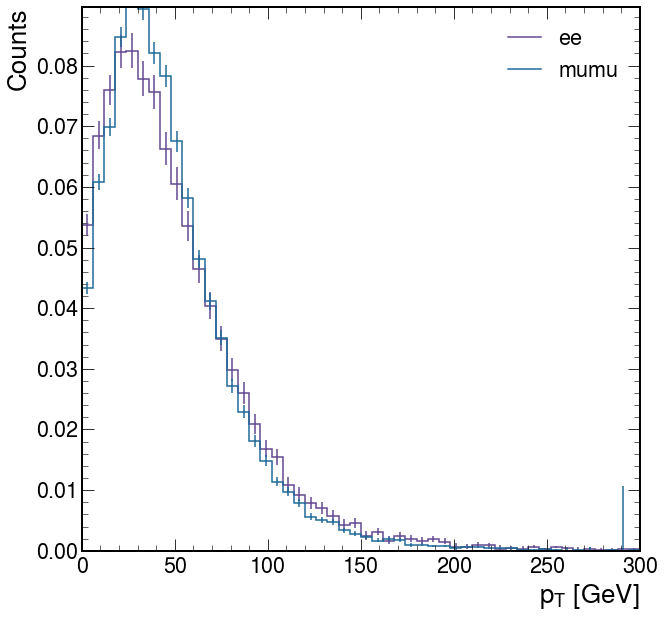

In [30]:
figs,ax2 = plt.subplots()
ax2 = plot.plot1d(outputZZq_b['ll_pt'].integrate("lepflav",'ee').integrate("plotgroup",'Z+jets'),density=True,ax=ax2)
plot.plot1d(outputZZq_b['ll_pt'].integrate("lepflav",'mumu').integrate("plotgroup",'Z+jets'),density=True,clear=False,ax=ax2)
# plot.plot1d(outputZZl_b['ll_pt'].integrate("lepflav",'ee').integrate("dataset",'DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8'),density=True,clear=False,ax=ax2)
# plot.plot1d(outputZZl_b['ll_pt'].integrate("lepflav",'mumu').integrate("dataset",'DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8'),density=True,clear=False,ax=ax2)
# hep.mpl_magic(ax=ax2)
ax2.legend(loc="upper right",labels=['ee','mumu'])

dict_keys(['nj', 'nbj', 'ncj', 'hj_dr', 'MET_sumEt', 'MET_significance', 'MET_covXX', 'MET_covXY', 'MET_covYY', 'MET_phi', 'MET_pt', 'mT1', 'mT2', 'mTh', 'dphi_lep1', 'dphi_lep2', 'dphi_ll', 'jetcsv_pt', 'jetcsv_eta', 'jetcsv_phi', 'jetcsv_mass', 'jetflav_pt', 'jetflav_eta', 'jetflav_phi', 'jetflav_mass', 'jetpn_pt', 'jetpn_eta', 'jetpn_phi', 'jetpn_mass', 'jetpt_pt', 'jetpt_eta', 'jetpt_phi', 'jetpt_mass', 'lep1_pt', 'lep1_eta', 'lep1_phi', 'lep1_mass', 'lep2_pt', 'lep2_eta', 'lep2_phi', 'lep2_mass', 'll_pt', 'll_eta', 'll_phi', 'll_mass', 'jetcsv_btagDeepCvL', 'jetflav_btagDeepCvL', 'jetpn_btagDeepCvL', 'jetpt_btagDeepCvL', 'jetcsv_btagDeepCvB', 'jetflav_btagDeepCvB', 'jetpn_btagDeepCvB', 'jetpt_btagDeepCvB', 'jetcsv_btagDeepFlavCvB', 'jetflav_btagDeepFlavCvB', 'jetpn_btagDeepFlavCvB', 'jetpt_btagDeepFlavCvB', 'jetcsv_btagDeepFlavCvL', 'jetflav_btagDeepFlavCvL', 'jetpn_btagDeepFlavCvL', 'jetpt_btagDeepFlavCvL', 'cutflow', 'sumw'])


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/hist_tools.py:377: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f8c6f957350>
  "Not all requested indices present in %r" % self, RuntimeWarning
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/hist_tools.py:377: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f8c6fd26810>
  "Not all requested indices present in %r" % self, RuntimeWarning
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:458: RuntimeWarning:

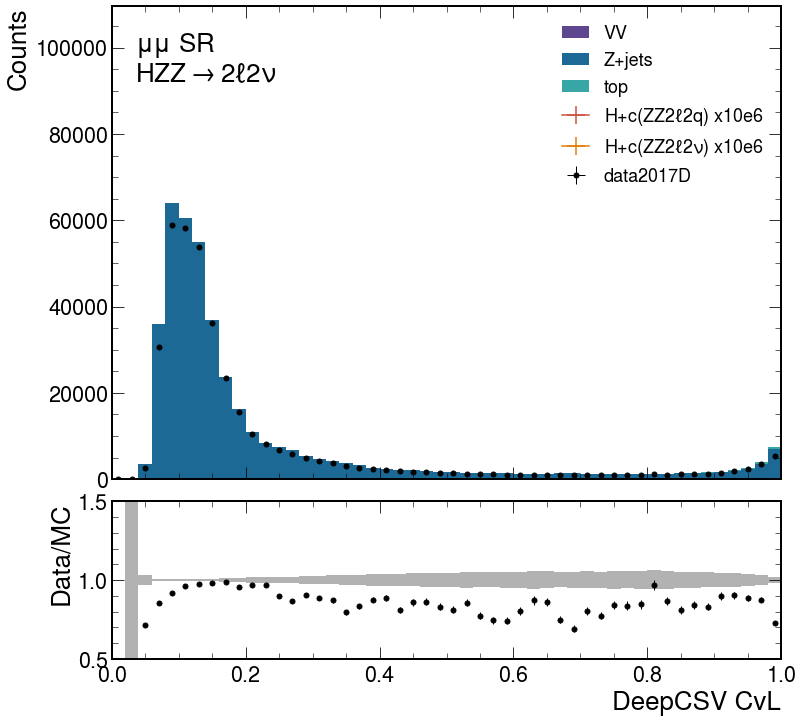

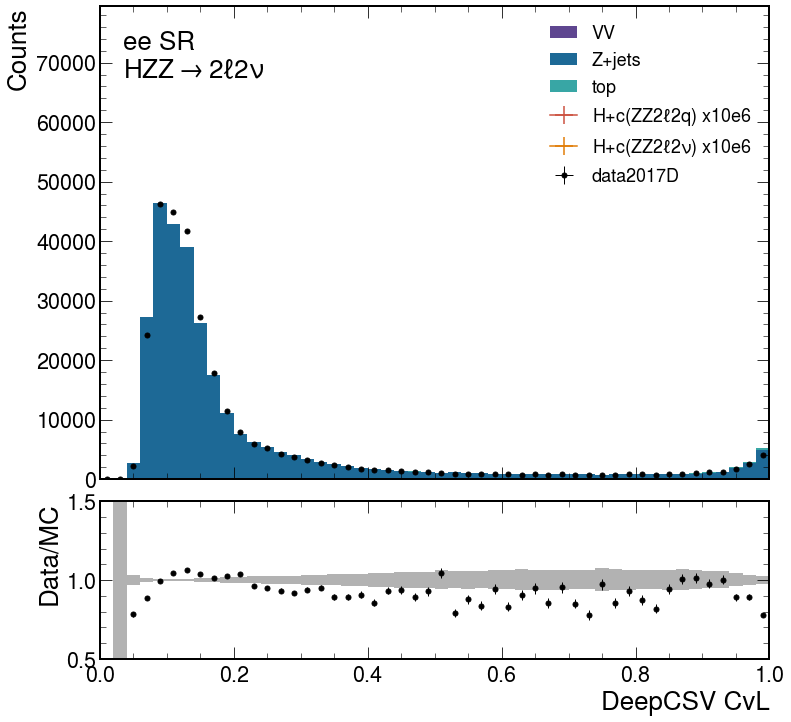

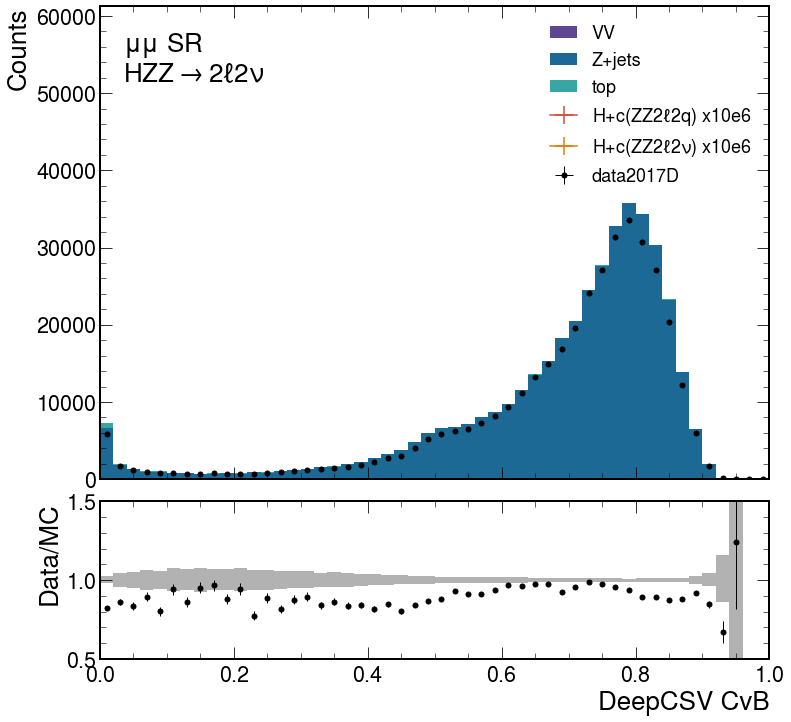

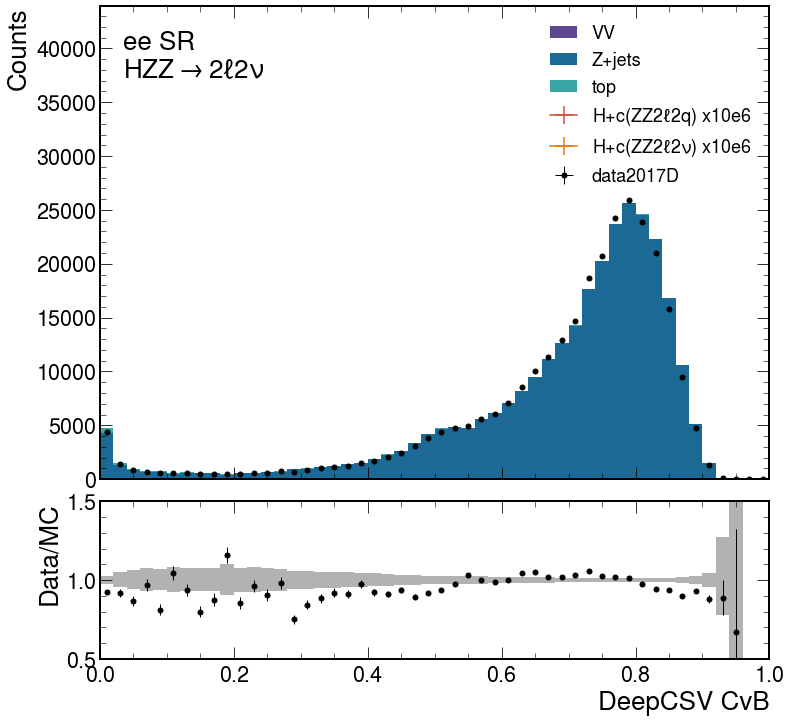

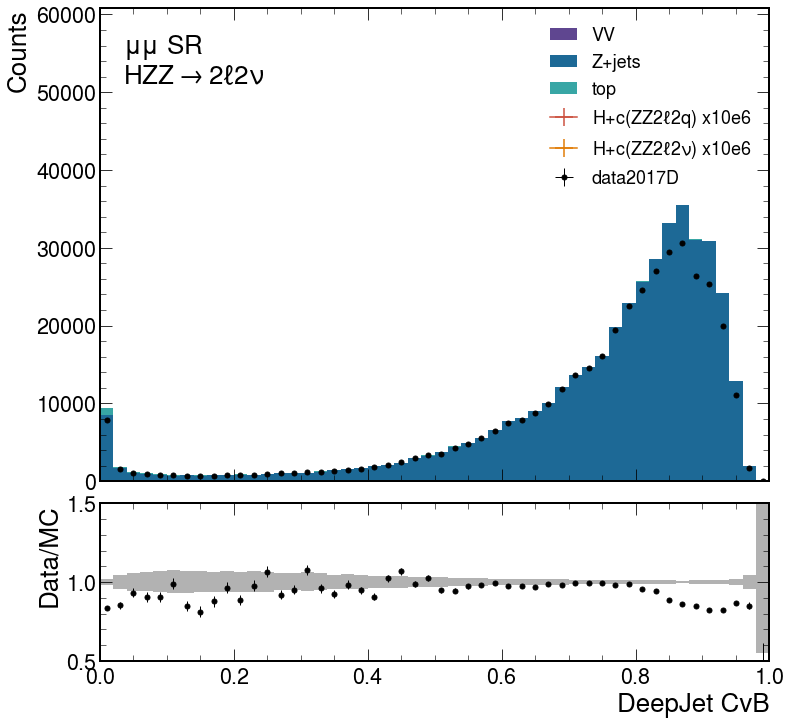

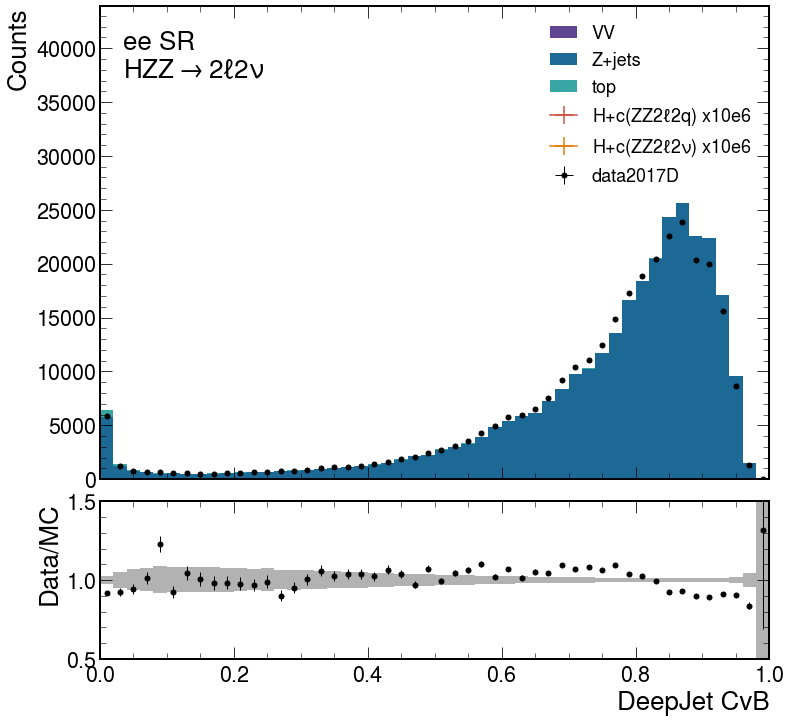

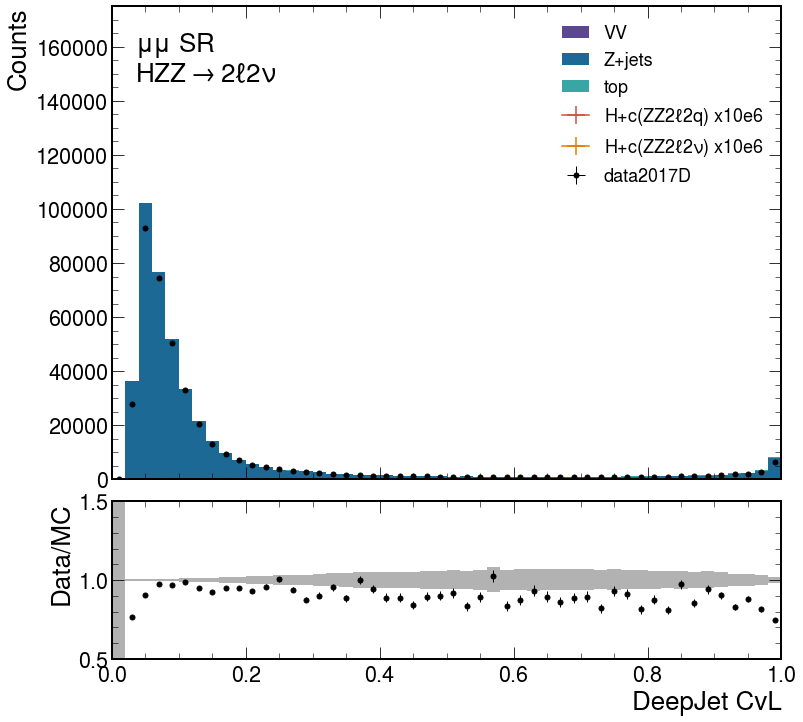

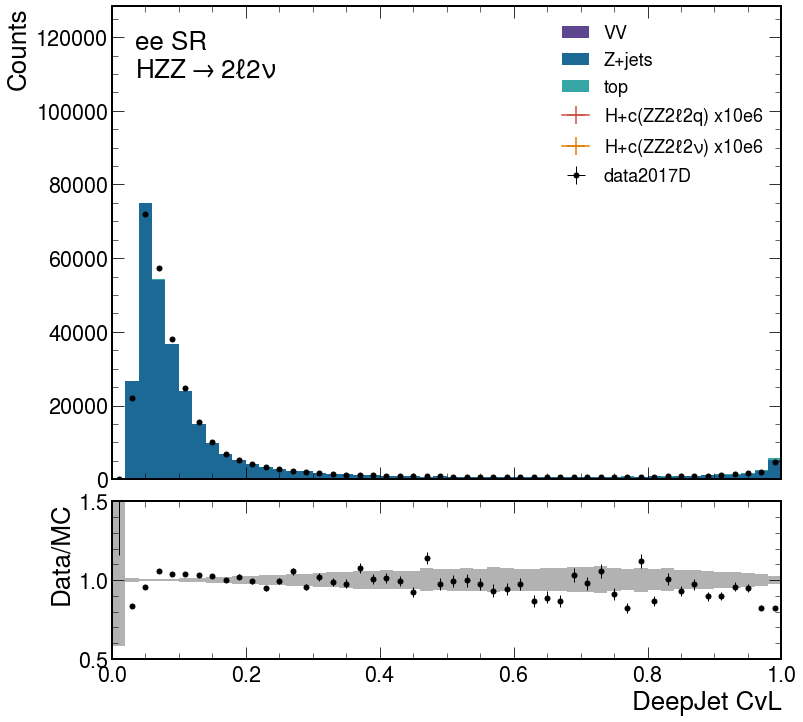

In [42]:
outputZZl_s = load('hists_HZZ2l2nu_signal_UL17.coffea')
outputZZl_b = load('hists_HZZ2l2nu_dy_up.coffea')
outputZZl_data = load('hists_HZZ2l2nu_dataD_noEG.coffea')
# outputZZl_dy = load('hists_HZZ2l2nu_dy_nl.coffea')
eventZZl_s = outputZZl_s['sumw']
eventZZl_b = outputZZl_b['sumw']
# eventZZl_dy = outputZZl_dy['sumw']
# print(outputZZl_b['cutflow'])
print(outputZZl_b.keys())
with open('metadata/plotmap.json') as pltf:
    var_map = json.load(pltf)
ch = ['mumu','ee']
os.makedirs('/eos/user/m/milee/www/HZZ2l2nu/', exist_ok=True)
for var in [ 'jetcsv_btagDeepCvL', 'jetcsv_btagDeepCvB', 'jetflav_btagDeepFlavCvB','jetflav_btagDeepFlavCvL']:#outputZZl_b.keys():   
    
    outputZZl_s[var]=scale_xs(outputZZl_s[var],4319,eventZZl_s)
    outputZZl_b[var]=scale_xs(outputZZl_b[var],4319,eventZZl_b)
#     outputZZl_dy[var]=scale_xs(outputZZl_dy[var],4319,eventZZl_dy)
#     outputZZl_b[var]['DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia']=outputZZl_dy[var][]
    outputZZl_b[var]=outputZZl_b[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hzz_MC'])
    
#     outputZZl_dy[var]=outputZZl_dy[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hzz_MC'])
    outputZZl_data[var]=outputZZl_data[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['data']) 
#     if var == 'nbj' or var == 'ncj' or 'jetpt_' in var or 'jetcsv_' in var  or 'jetpn_' in var or var=='nj' or 'dr' in var or var=='MET_covXY'or 'MET' in var or 'dphi' in var: continue    
#     if var == 'cutflow':break
#     if 'jetcsv_btagDeep' not in var and 'jetflav_btagDeep' not in var :continue
    if var =='cutflow' :break
    for chs in ch:
        fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
#         print(sum(outputZZl_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2l2nu').values()[()])/1e6)
#         print(sum(outputZZl_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2l2nu').values()[()])/1e6/math.sqrt(sum(outputZZl_b[var].integrate("lepflav",chs).sum('plotgroup').values()[()])))
#         print(ssum(outputZZl_b[var].integrate("lepflav",chs).sum('plotgroup').values()[()]),sum(outputZZl_data[var].integrate("lepflav",chs).sum('plotgroup').values()[()]))
        fig.subplots_adjust(hspace=.07)        
        if 'jet' in var:
            ax = plot.plot1d(outputZZl_b[var].sum("flav").integrate("lepflav",chs),overlay="plotgroup",stack=True,ax=ax)
            plot.plot1d(outputZZl_s[var].sum("flav").integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Q'),error_opts={'color':'#CC503E','elinewidth': 1,'markersize':0},line_opts={'color':'#CC503E'},clear=False,ax=ax)
            plot.plot1d(outputZZl_s[var].sum("flav").integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Nu'),error_opts={'color':'#E17C05','elinewidth': 1,'markersize':0},line_opts={'color':'#E17C05'},clear=False,ax=ax)
        

            plot.plot1d(outputZZl_data[var].sum("flav").integrate("lepflav",chs).sum("plotgroup"),clear=False,error_opts=data_err_opts,ax=ax)
            rax = plot.plotratio(                                      num=outputZZl_data[var].sum("plotgroup").sum("flav").integrate("lepflav",chs),
                                        denom=outputZZl_b[var].sum("plotgroup").sum("flav").integrate("lepflav",chs),
                                                ax=rax,
                                                error_opts=data_err_opts,
                                                denom_fill_opts={},                                              
#                                       
                                                unc='num',
                                            clear=False
                                                )
            rax.set_ylim(0.5,1.5)
        else: 
            ax=plot.plot1d(outputZZl_b[var].integrate("lepflav",chs),overlay="plotgroup",stack=True,ax=ax)
            plot.plot1d(outputZZl_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Q'),error_opts={'color':'#CC503E','elinewidth': 1,'markersize':0},line_opts={'color':'#CC503E'},clear=False,ax=ax)
            plot.plot1d(outputZZl_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Nu'),error_opts={'color':'#E17C05','elinewidth': 1,'markersize':0},line_opts={'color':'#E17C05'},clear=False,ax=ax)
            plot.plot1d(outputZZl_data[var].integrate("lepflav",chs).sum("plotgroup"),clear=False,error_opts=data_err_opts,ax=ax)
            
            rax = plot.plotratio(
	                                        num=outputZZl_data[var].sum("plotgroup").integrate("lepflav",chs),
                                                denom=outputZZl_b[var].sum("plotgroup").integrate("lepflav",chs),
                                                ax=rax,
                                                error_opts=data_err_opts,
                                                denom_fill_opts={},    
                                                unc='num',
                                                clear=False)
        rax.set_ylim(0.5,1.5)     
        rax.set_ylabel('Data/MC')
        rax.set_xlabel(var_map[var])
        ax.set_xlabel('')
        chl = chs
        if chs =='mumu' :chs='$\mu\mu$'
        region = 'SR'
        at = AnchoredText(chs+" "+ region+ "\n" + r"HZZ$\rightarrow 2\ell 2\nu$"                                                         
                                        , loc='upper left',frameon=False)
        ax.add_artist(at)
        leg_label = ax.get_legend_handles_labels()[1]
        leg_label[-1]='data2017D'
        leg_label[-3]='H+c(ZZ2$\\ell$2q) x10e6'
        leg_label[-2]='H+c(ZZ$2\\ell 2\\nu$) x10e6'
#         leg_label[-4]='H($WW \to \ell\nu 2q$)+cx10e6'
#         leg_label[-5]='H($WW \to 2\ell 2\nuq$)+cx10e6'
        ax.legend(loc="upper right",handles=ax.get_legend_handles_labels()[0],labels=leg_label,fontsize=18)
        hep.mpl_magic(ax=ax)
        fig.savefig("/eos/user/m/milee/www/HZZ2l2nu/%s_%s_%s.pdf" %(chl,region,var))
        fig.savefig("/eos/user/m/milee/www/HZZ2l2nu/%s_%s_%s.png" %(chl,region,var))